<a href="https://colab.research.google.com/github/minjeeons/private-project/blob/main/music_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np

train=pd.read_csv('/content/gdrive/MyDrive/데이콘 연습/music_train.csv')
test=pd.read_csv('/content/gdrive/MyDrive/데이콘 연습/music_test.csv')
sample_submisson=pd.read_csv('/content/gdrive/MyDrive/데이콘 연습/music_sample_submission.csv')

Mounted at /content/gdrive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
plt.rc('font',family='NanumBarunGothic')

In [ ]:
train.head()

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,TRAIN_00000,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,TRAIN_00001,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,TRAIN_00002,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,TRAIN_00003,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,TRAIN_00004,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25383 entries, 0 to 25382
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25383 non-null  object 
 1   danceability      25383 non-null  float64
 2   energy            25383 non-null  float64
 3   key               25383 non-null  int64  
 4   loudness          25383 non-null  float64
 5   speechiness       25383 non-null  float64
 6   acousticness      25383 non-null  float64
 7   instrumentalness  25383 non-null  float64
 8   liveness          25383 non-null  float64
 9   valence           25383 non-null  float64
 10  tempo             25383 non-null  float64
 11  duration          25383 non-null  int64  
 12  genre             25383 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 2.5+ MB


#Visualization

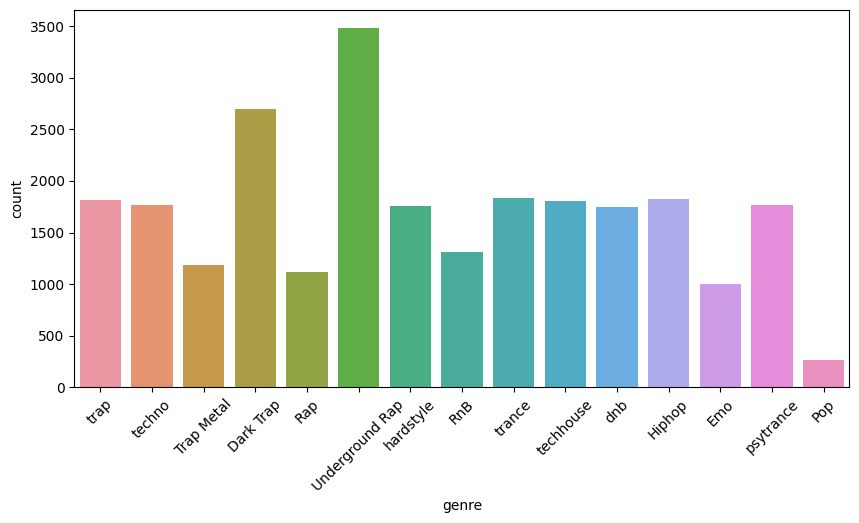

In [ ]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)

sns.countplot(x=train['genre'])
plt.xticks(rotation=45)
plt.show()

#Feature 분포

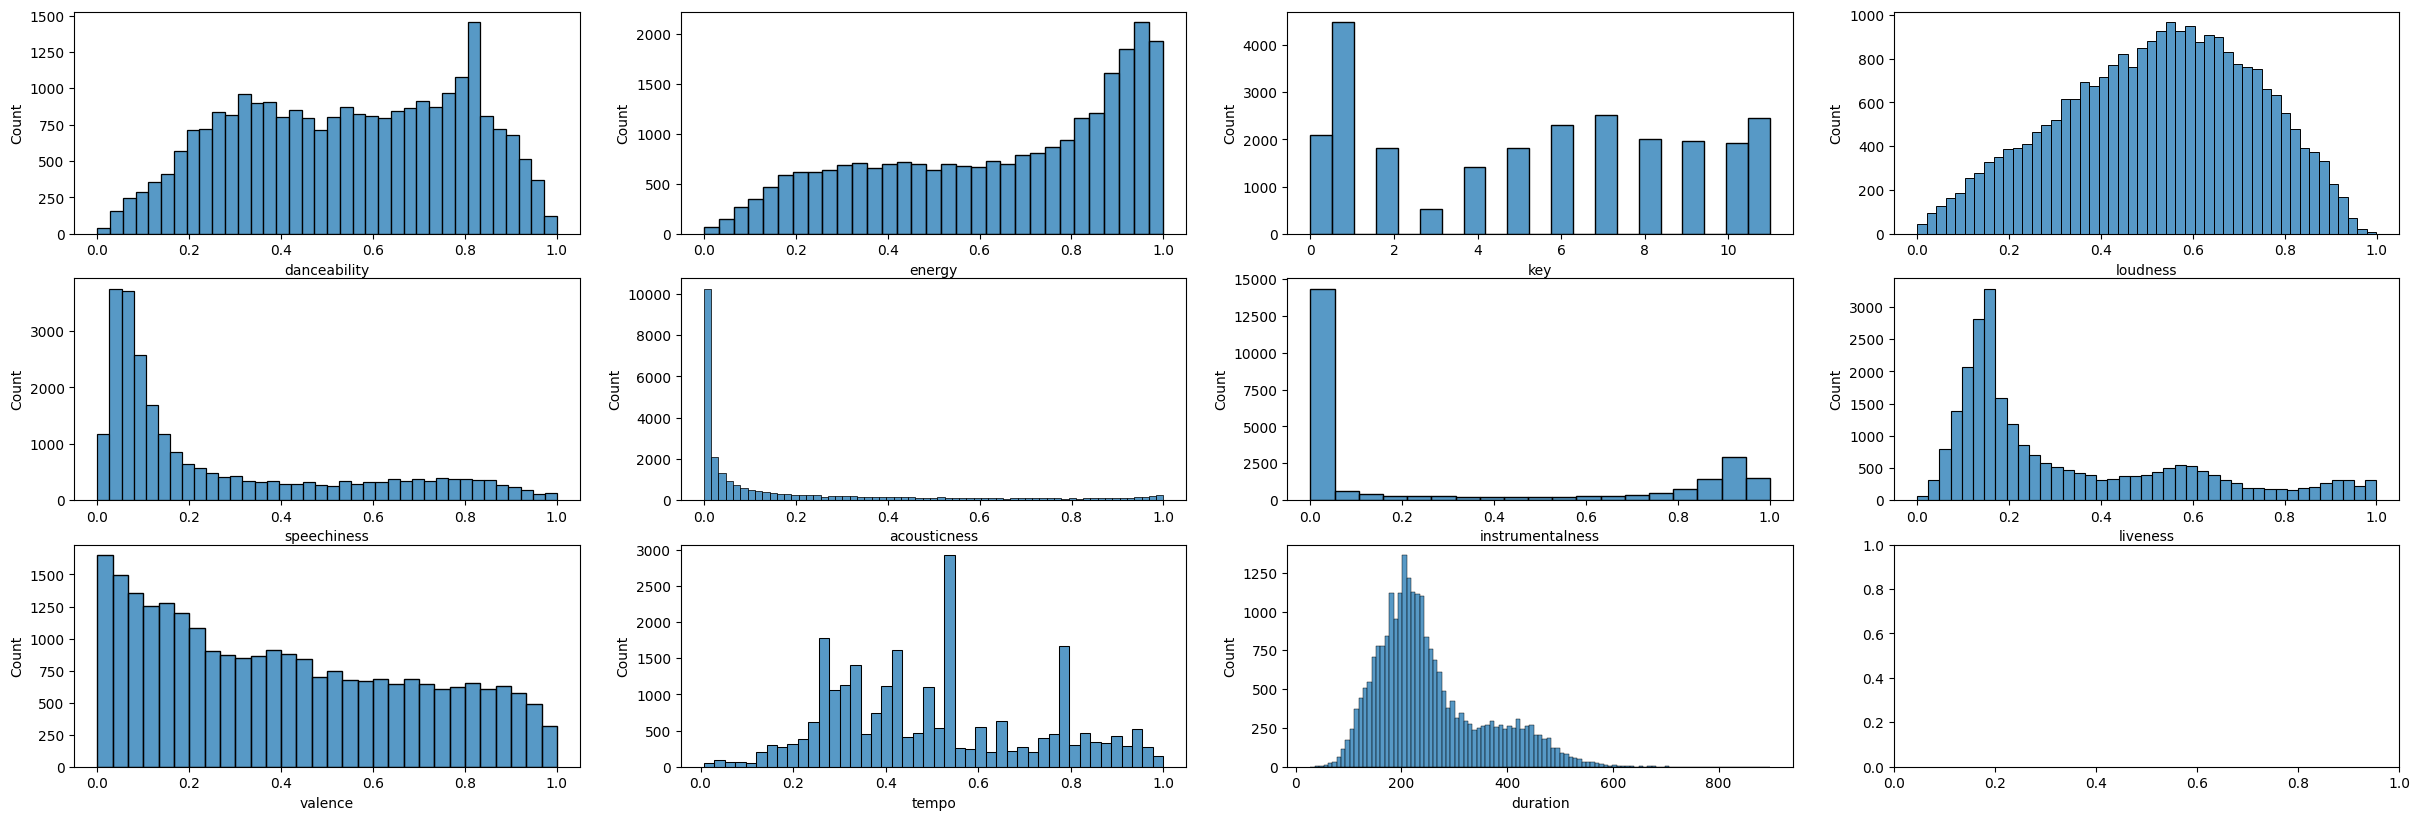

In [ ]:
fig,axs=plt.subplots(figsize=(30,10),ncols=4,nrows=3,dpi=100)
Im_features=['danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration']

for i,j in enumerate(Im_features):
  row = int(i/4)
  col=i%4

  sns.histplot(x=train[j],ax=axs[row][col])

#정규분포 거의 없음

#Target과 Feature의 관계

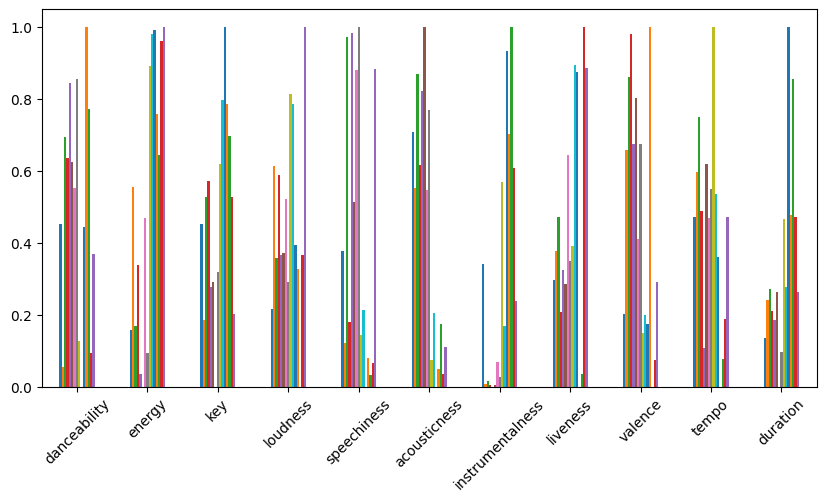

In [ ]:
from sklearn.preprocessing import MinMaxScaler
fig,ax = plt.subplots(figsize=(10,5),dpi=100)

scaler=MinMaxScaler()
temp=train.groupby(by='genre').mean()
temp[train.groupby(by='genre').mean().columns] = scaler.fit_transform(train.groupby(by='genre').mean())
temp.T.plot(kind='bar',legend=False,ax=ax)
plt.xticks(rotation=45)
plt.show()

#각 장르별로 변수의 분포가 확연히 다름


#상관관계 확인

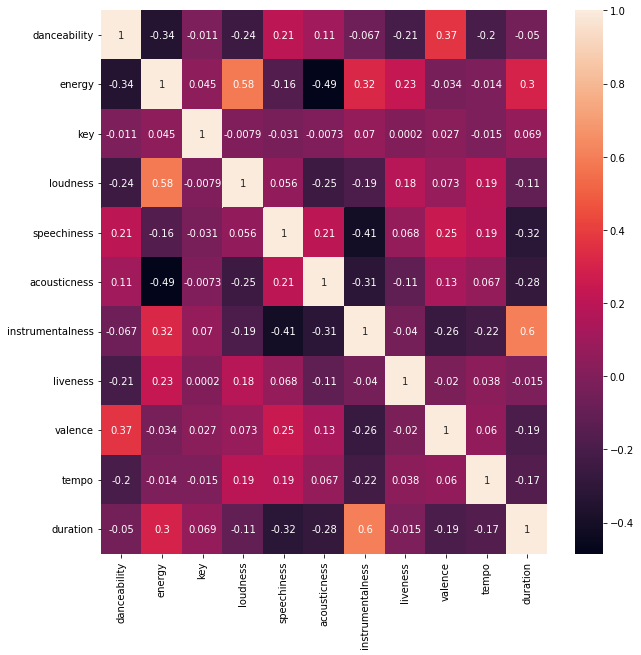

In [ ]:
plt.figure(figsize=(10,10))
df=train.corr()
sns.heatmap(df,annot=True)

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score



In [ ]:
import warnings
warnings.filterwarnings('ignore')

#랜덤시드 고정

매번 고정된 결과를 얻기 위해서 사용합니다.
seed를 고정하지 않는다면 같은 코드라도 매번 다른 결과가 나오게됩니다.
항상 동일한 결과를 얻기 위해서 사용합니다

In [ ]:
def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASEED']=str(seed)
  np.random.seed(seed)

seed_everything(42) # seed 고정



In [ ]:
# X는 독립변수이므로 종속변수를 제거합니다. 또한 target 이외의 문자열 데이터를 제거합니다.
X=train.drop(['ID','genre'],axis=1)
y=train[['genre']]
test=test.drop(['ID'],axis=1)


In [ ]:
# 학습데이터, 검증데이터 분리
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

#모델정의

RandomForest는 tree기반 모델로, DecisionTree를 여러 개 생성하여 그들의 평균으로 예측의 성능을 높이는 Ensemble Machine Learning 모델입니다.

In [ ]:
model=RandomForestClassifier(random_state=42)

#모델 학습

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

#모델 검증

모델이 어느정도 정답을 맞추는지 검증을 통해 대략적으로 확인할 수 있습니다.
대회 평가 지표인 Macro-F1 Score로 검증을 수행하겠습니다.
모델에 검증데이터를 입력하여 검증 점수를 예측합니다.

In [ ]:
val_pred=model.predict(X_valid)

In [ ]:
# Macro f1 score을 사용하기 위해 average 인자 값을 "macro" 로 설정해줍니다.
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.6261751859544912입니다.


In [ ]:
# 최종 예측을 하기위해 test값을 입력합니다.
pred = model.predict(test)

In [ ]:
# 제출 파일을 불러옵니다.

sample_submisson["genre"] = pred

In [ ]:
sample_submisson

,ID,genre
0,TEST_00000,Hiphop
1,TEST_00001,Dark Trap
2,TEST_00002,Emo
3,TEST_00003,techhouse
4,TEST_00004,Pop
...,...,...
16917,TEST_16917,techhouse
16918,TEST_16918,Hiphop
16919,TEST_16919,hardstyle
16920,TEST_16920,psytrance


In [ ]:
sample_submisson.to_csv("./submit.csv", index = False)